In [1]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats

#Load the modules
import Extractors as e
import Classifiers as c
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
e = reload(e)
c = reload(c)
dmlt = reload(dmlt)

#Ignore random warning that happen when the modules are reloaded
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Define some important variables

order = 12          #The order of approximation to use in all feature extraction
zeroth = False      #Whether or not to use the constant term of the approximating functions
positive = "Normal" #The classification which is considered a 'positive' results when finding the F1 score
n = 2               #The number of most significant features to actually use in classification

# Classify simulated data

## The variant parameter is the noise level of the data
## The Cole-Cole parameters are exact for each classification
## Evaluate effectiveness of each model
## Measure the correlation of the features with the parameters

In [3]:
#Create classifiers for simulated data

#Load simulated data of varying noise levels
classes = "18OctoberSim/simClasses.csv"
data01 = "18OctoberSim/simLowData.csv"
data10 = "18OctoberSim/simHighData.csv"

titles = ["1% noise","10% noise"]

n_dt = 2 #Number of data sets (noise steps)
n_ex = 3 #Number of extractors
n_cl = 3 #Number of classifiers

#Initialize models using each combination of extractors and classifiers
SimModels = []
for classifier in c.All:
    for extractor in e.All:
        SimModels.append(dmlt.Model(extractor,classifier,order,zeroth))

#For each model, load a seperate Token for each data set
SimData = []
for model in SimModels:
    SimData.append(model.load(classes,data01))
    SimData.append(model.load(classes,data10))

#Generate variances for each set
for token in SimData:
    token.genVariances(n,0,zeroth)

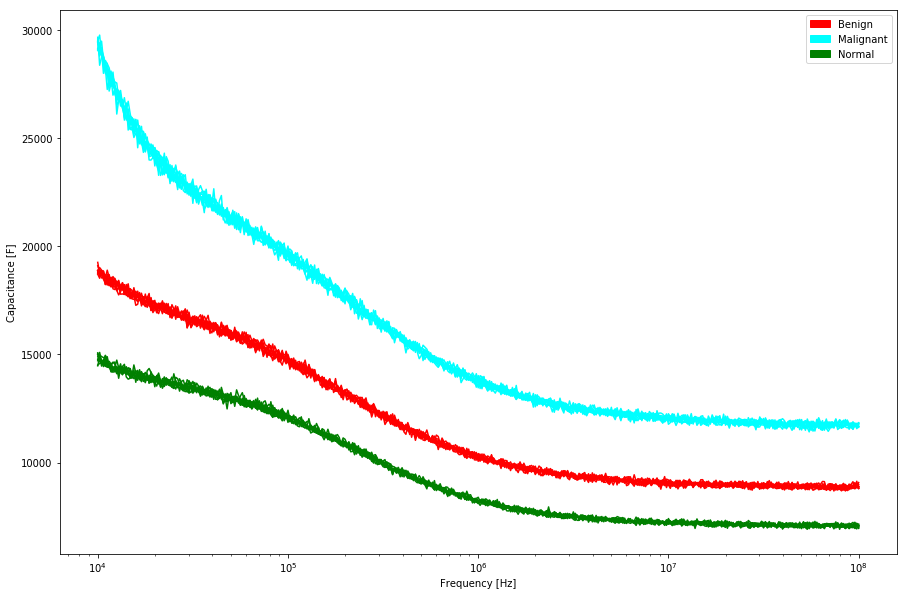

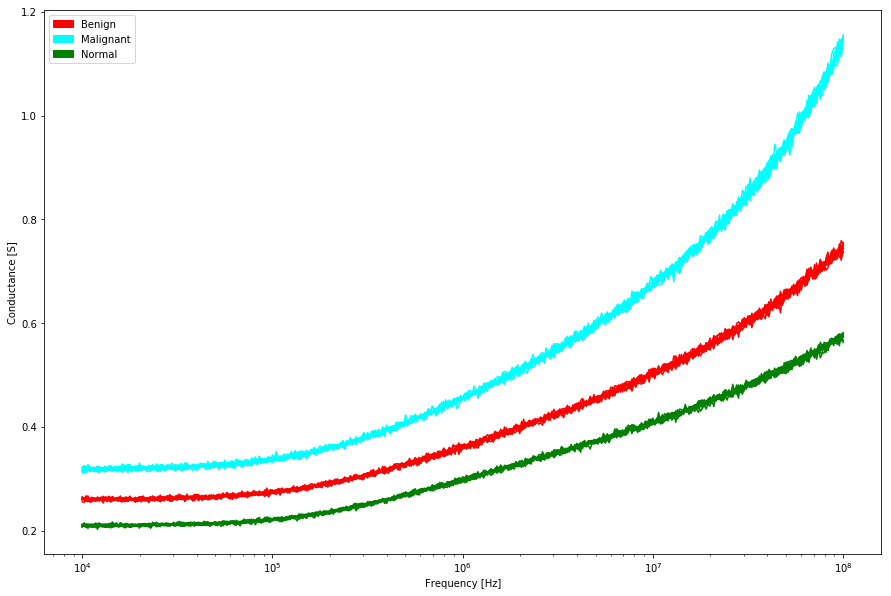

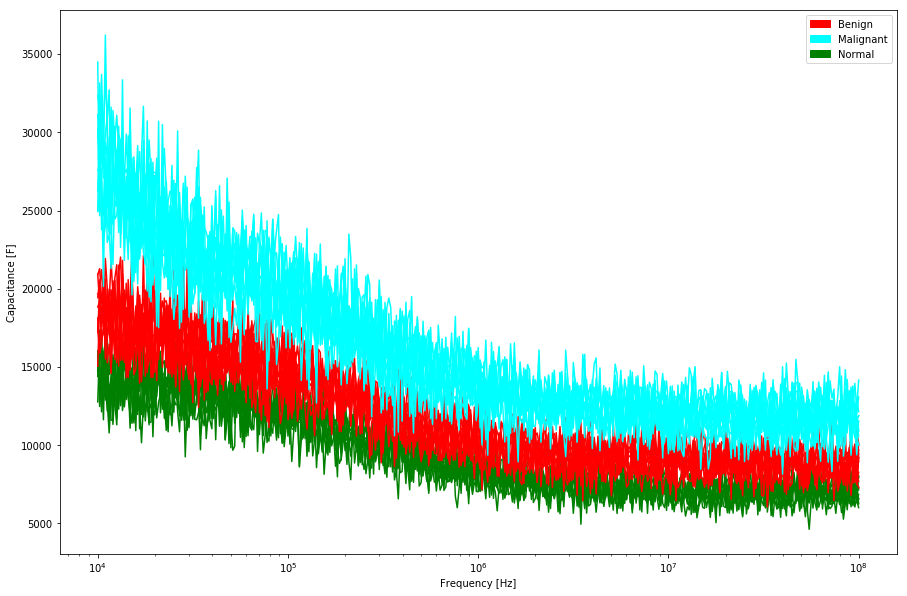

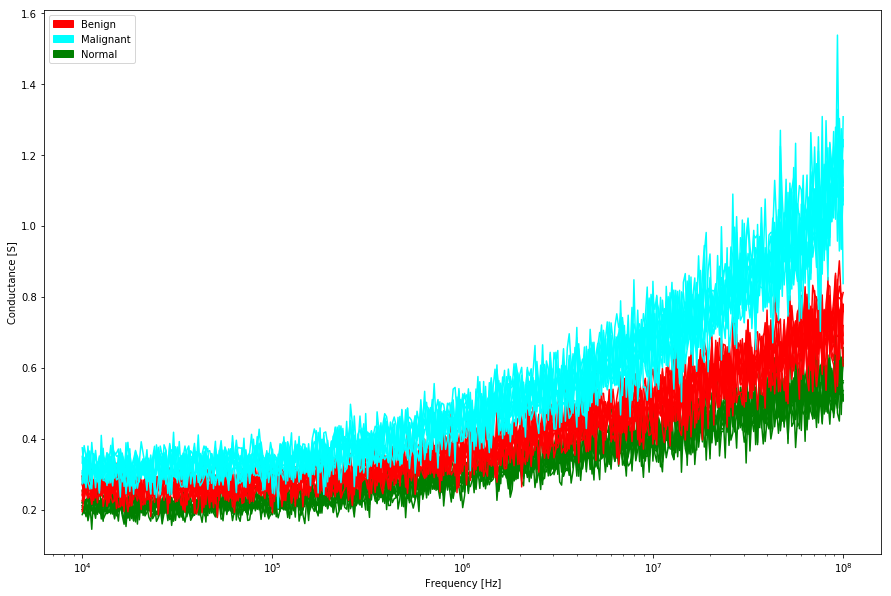

In [4]:
#Visualize data

#1%

imaginary = 0
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Capacitance [F]')
#plt.yscale('log')
SimModels[0].plotSamples(SimData[0],imaginary)
plt.show()

imaginary = 1
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Conductance [S]')
#plt.yscale('log')
SimModels[0].plotSamples(SimData[0],imaginary)
plt.show()

#10%

imaginary = 0
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Capacitance [F]')
#plt.yscale('log')
SimModels[1].plotSamples(SimData[1],imaginary)
plt.show()

imaginary = 1
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Conductance [S]')
#plt.yscale('log')
SimModels[1].plotSamples(SimData[1],imaginary)
plt.show()

In [5]:
#Evaluate models
pylab.rcParams['figure.figsize'] = (10, 5)

#Test model
for model in range(len(SimData)):
    print SimModels[model/2].name[0]
    print SimModels[model/2].name[1]
    print titles[model%n_dt]
    SimModels[model/2].train(SimData[model],[],True,False)
    results = SimModels[model/2].test(SimData[model],positive,True)
    print results[:4]
    print ''

ComplexFourier
Naive Bayes Real
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Naive Bayes Real
10% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

Bernstein
Naive Bayes Real
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

Bernstein
Naive Bayes Real
10% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

PCA
Naive Bayes Real
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

PCA
Naive Bayes Real
10% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Naive Bayes Imaginary
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Naive Bayes Imaginary
10% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

Bernstein
Naive Bayes Imaginary
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

Bernstein
Naive Bayes Imaginary
10% noise
20 0
1 9
[0.9666666666666667, 1.0, 0.9, 0.9473684210526315]

PCA
Naive Bayes Imaginary
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

PCA
Naive Bayes Imaginary
10% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Kernel Density Estimation Real
1% noise
20 0
0 10
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Kernel Density Estima

ComplexFourier
Average real correlation:  0.3670769230769231
Average imag correlation:  0.46333846153846153


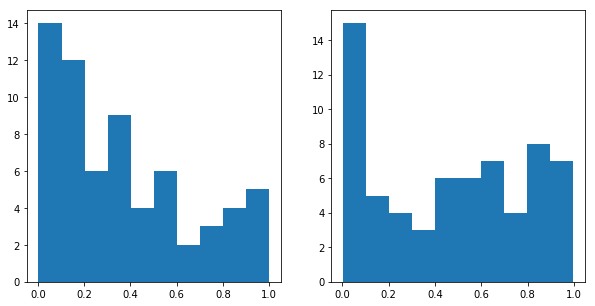


Bernstein
Average real correlation:  0.49887692307692305
Average imag correlation:  0.5134923076923077


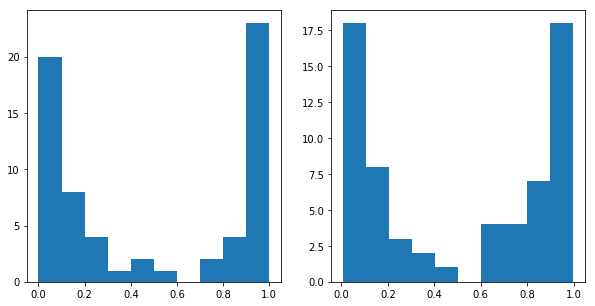


PCA
Average real correlation:  0.5394
Average imag correlation:  0.0782


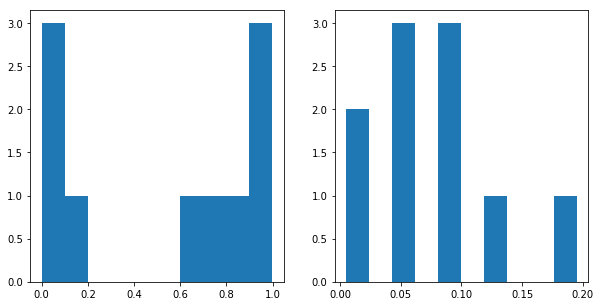

In [6]:
#Calculate the correlation coefficients between each Cole-Cole parameter and each order of feature

#Load data sets which vary Cole-Cole parameters one at a time
parameters = ["Lambda","Epsilon","Tau","Alpha","Sigma"]
tmpModels = [dmlt.Model(extractor,c.NaiveBayesReal,order,zeroth) for extractor in e.All]
paramData = []
paramData += [[tmpModel.load("SimulatedData/sim"+p+"ClassNormal.csv","SimulatedData/sim"+p+"Normal.csv") for p in parameters] for tmpModel in tmpModels]
paramData += [[tmpModel.load("SimulatedData/sim"+p+"ClassBenign.csv","SimulatedData/sim"+p+"Benign.csv") for p in parameters] for tmpModel in tmpModels]
paramData += [[tmpModel.load("SimulatedData/sim"+p+"ClassMalignant.csv","SimulatedData/sim"+p+"Malignant.csv") for p in parameters] for tmpModel in tmpModels]

#Print the correlation between each parameter and feature
for i in range(len(tmpModels)):
    corrsReal = []
    corrsImag = []
    print tmpModels[i].name[0]
    for j in range(len(paramData[0])):
        X = [float(k) for k in paramData[i][j].getAllY()]
        Y = [paramData[i][j].getFeaturesByOrder(k) for k in range(order+1)]
        x = np.corrcoef([X]+np.real(Y).tolist())[0,1:]*1000
        corrsr = x[~numpy.isnan(x)].astype(int)/1000.0
        corrsReal += np.abs(corrsr).tolist()
        x = np.corrcoef([X]+np.imag(Y).tolist())[0,1:]*1000
        corrsi = x[~numpy.isnan(x)].astype(int)/1000.0
        corrsImag += np.abs(corrsi).tolist()
#         print parameters[j]
#         print "Real"
#         print corrsr
#         print "Imaginary"
#         print corrsi
#         print ""
    corrsReal = np.asarray(corrsReal)
    corrsImag = np.asarray(corrsImag)
    print "Average real correlation: ",np.mean(corrsReal)
    print "Average imag correlation: ",np.mean(corrsImag)
    plt.subplot(121)
    plt.hist(corrsReal)
    plt.subplot(122)
    plt.hist(corrsImag)
    plt.show()
    print ""

#The presence of high correlations in each model indicates that the decomposition features encapsulate
#the behavior of the data as well as the Cole-Cole parameters

#The fact that PCA real and Bernstein imaginary have the highest average absolute correlations indicate
#that those models will perform the best overall

# Classify real data

## Perform feature extraction on real data
## Perform reconstructions
## Evaluate them
## Classify data every way

In [7]:
#Create classifiers for real data

positive = "Healthy"

#Load data
cancer = ["kidney_final/KidneyClass.csv","kidney_final/KidneyData.csv"]

n_dt = 1 #Number of data sets
n_ex = 3 #Number of extractors
n_cl = 3 #Number of classifiers

#Initialize models using each combination of extractors and classifiers
CancerModels = []
for classifier in c.All:
    for extractor in e.All:
        CancerModels.append(dmlt.Model(extractor,classifier,order,zeroth))

#For each model, load a seperate Token for each data set
CancerData = []
for model in CancerModels:
    CancerData.append(model.load(cancer[0],cancer[1]))
    
#Generate variances for each set
for token in CancerData:
    token.genVariances(n,0,zeroth)

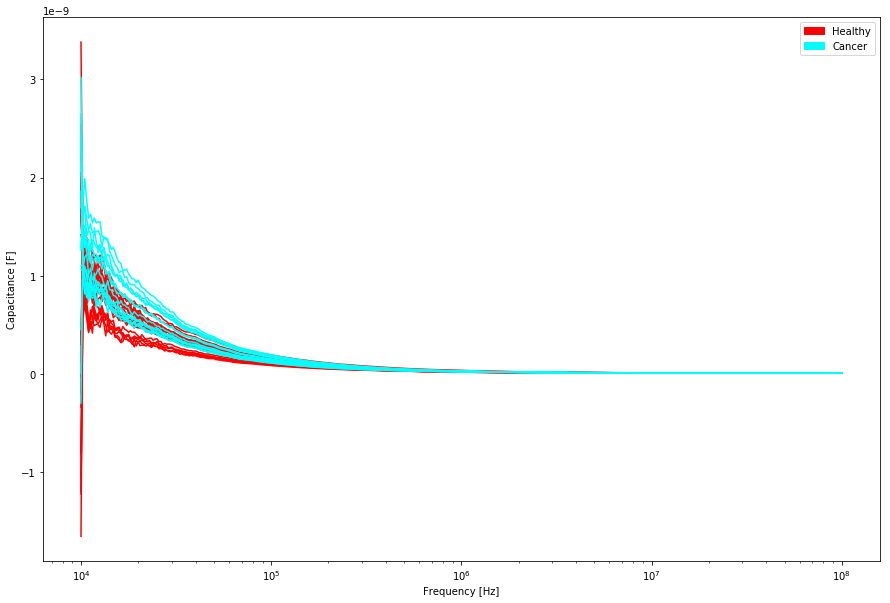

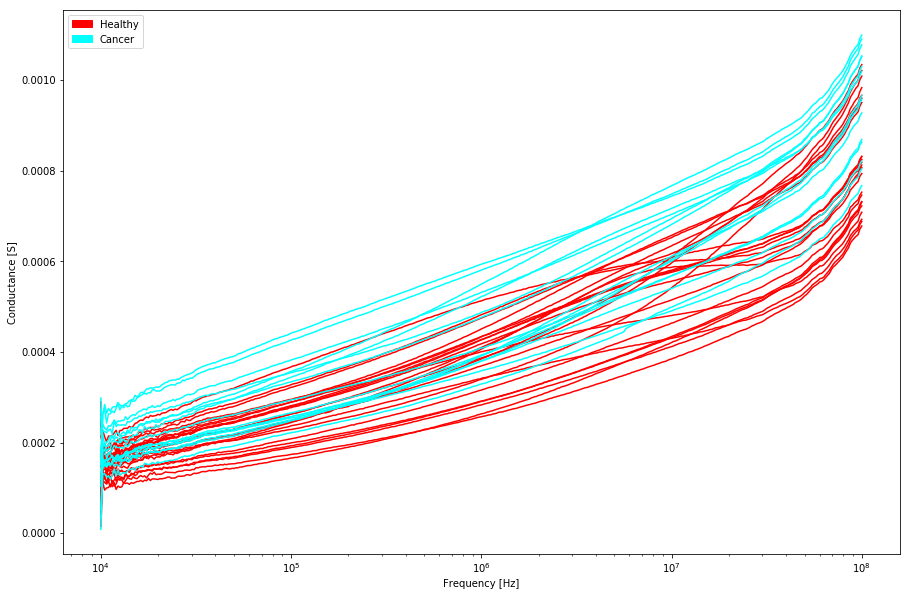

In [8]:
#Visualize data
pylab.rcParams['figure.figsize'] = (15, 10)

imaginary = 0
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Capacitance [F]')
CancerModels[0].plotSamples(CancerData[0],imaginary)
plt.show()

imaginary = 1
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Conductance [S]')
CancerModels[0].plotSamples(CancerData[0],imaginary)
plt.show()

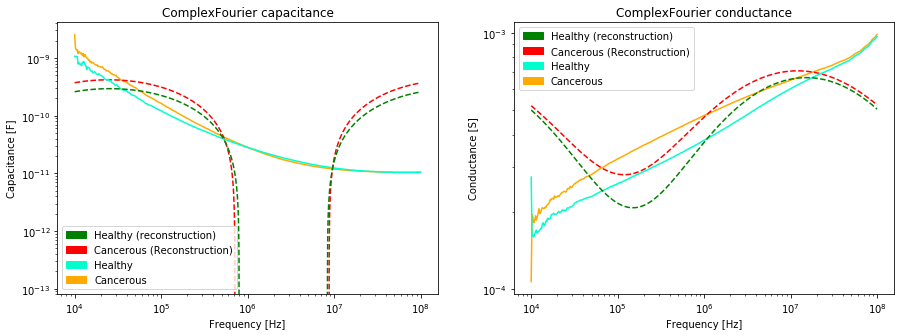

In [9]:
##### Reconstructed plots
pylab.rcParams['figure.figsize'] = (15, 5)

green_patch = mpatches.Patch(color='green', label='Healthy (reconstruction)')
red_patch = mpatches.Patch(color='red', label='Cancerous (Reconstruction)')
green_patch2 = mpatches.Patch(color='#00ffcc', label='Healthy')
red_patch2 = mpatches.Patch(color='#ffaa00', label='Cancerous')

for model in range(n_ex)[:1]:
    #Real
    imaginary = 0
    plt.subplot(121)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Capacitance [F]')
    plt.legend(handles=[green_patch,red_patch,green_patch2,red_patch2])
    plt.title(CancerModels[model].C.name+" capacitance")

    CancerModels[model].plotSample(CancerData[model],0,'#ffaa00',imaginary)
    CancerModels[model].plotApproximation(CancerData[model],0,'r--',imaginary,0,np.real(CancerData[model].feats).astype(int))

    CancerModels[model].plotSample(CancerData[model],34,'#00ffcc',imaginary)
    CancerModels[model].plotApproximation(CancerData[model],34,'g--',imaginary,0,np.real(CancerData[model].feats).astype(int))

    #Imaginary
    imaginary = 1
    plt.subplot(122)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Conductance [S]')
    plt.legend(handles=[green_patch,red_patch,green_patch2,red_patch2])
    plt.title(CancerModels[model].C.name+" conductance")

    CancerModels[model].plotSample(CancerData[model],0,'#ffaa00',imaginary)
    CancerModels[model].plotApproximation(CancerData[model],0,'r--',imaginary,0,np.imag(CancerData[model].feats).astype(int))

    CancerModels[model].plotSample(CancerData[model],34,'#00ffcc',imaginary)
    CancerModels[model].plotApproximation(CancerData[model],34,'g--',imaginary,0,np.imag(CancerData[model].feats).astype(int))

    plt.show()

In [10]:
## Calculate average relative error:
#Sum of the squares of the differences between each point and the approximation
#Divided by the standard deviation of all points for normalization
#Averaged across each sweep

print "\t\tHealthy\t\tCancer"
for model in range(n_ex)[:1]:
    sumHealthy = 0.0
    numHealthy = 0.0
    sumCancer = 0.0
    numCancer = 0.0
    for row in range(CancerData[model].size):
        #Real
        imaginary = 0
        realPart = CancerModels[model].plotApproximation(CancerData[model],row,'',imaginary,0,np.real(CancerData[model].feats).astype(int))
        #plt.plot(realPart)

        #Imaginary
        imaginary = 1
        imagPart = CancerModels[model].plotApproximation(CancerData[model],row,'',imaginary,0,np.imag(CancerData[model].feats).astype(int))
        
        approx = np.absolute(np.asarray(realPart) + 1j*np.asarray(imagPart))[:400]
        actual = np.absolute(np.asarray(CancerData[model].getAllData()[0][row]))[:400]

        if CancerData[model].getAllY()[row] == positive:
            sumHealthy += sum(np.abs(approx-actual))/np.std(np.abs(approx-actual))
            numHealthy += 1
        else:
            sumCancer += sum(np.abs(approx-actual))/np.std(np.abs(approx-actual))
            numCancer += 1
    print "%s\t%f\t%f"%(CancerModels[model].C.name,sumHealthy/numHealthy,sumCancer/numCancer)

		Healthy		Cancer
ComplexFourier	388.610209	395.530834


In [13]:
#Evaluate models
pylab.rcParams['figure.figsize'] = (15, 10)
colors = ['#ff0000','#00cc00','#0000ff','#ff7700']
colors_ = ['#ffaaaa','#aaccaa','#aaaaff','#ffccaa']

#Arrays of metrics about results
fourierReal = []
fourierImag = []
fourierBoth = []
bernsteinReal = []
bernsteinImag = []
bernsteinBoth = []
pcaReal = []
pcaImag = []
pcaBoth = []

#Test model
for model in range(len(CancerData)):
    #print var[model]
    print CancerModels[model].name[0]
    print CancerModels[model].name[1]
    CancerModels[model].train(CancerData[model],[],True,0)
    results = CancerModels[model].test(CancerData[model],positive,True,False,True)
    #print CancerModels[model].test(CancerData[model],positive,True,False,False)[:4]
    print ''
    
    #Do statistical analysis using likelihood estimations from every test
    
    if CancerModels[model].name[0] == "ComplexFourier":
        fourierBoth += results
    elif CancerModels[model].name[0] == "Bernstein":
        bernsteinBoth += results
    elif CancerModels[model].name[0] == "PCA":
        pcaBoth += results

    if "Real" in CancerModels[model].name[1]:
        if CancerModels[model].name[0] == "ComplexFourier":
            fourierReal += results
        elif CancerModels[model].name[0] == "Bernstein":
            bernsteinReal += results
        elif CancerModels[model].name[0] == "PCA":
            pcaReal += results
    
    if "Imag" in CancerModels[model].name[1]:
        if CancerModels[model].name[0] == "ComplexFourier":
            fourierImag += results
        elif CancerModels[model].name[0] == "Bernstein":
            bernsteinImag += results
        elif CancerModels[model].name[0] == "PCA":
            pcaImag += results

    plt.show()

#If t is positive, pca is better. If t is negative, fourier is better
#Within p
#Real part
print "Real part"
tests = [scipy.stats.ttest_rel(pcaReal,fourierReal),scipy.stats.ttest_rel(pcaReal,bernsteinReal)]
for test in tests:
    if test.statistic < 0:
        print "Mine, p =",test.pvalue/2.0
    else:
        print "PCA, p =",test.pvalue/2.0
print ''
#Imaginary part
print "Imaginary part"
tests = [scipy.stats.ttest_rel(pcaImag,fourierImag),scipy.stats.ttest_rel(pcaImag,bernsteinImag)]
for test in tests:
    if test.statistic < 0:
        print "Mine, p =",test.pvalue/2.0
    else:
        print "PCA, p =",test.pvalue/2.0
print ''
#Both
print "Both"
tests = [scipy.stats.ttest_rel(pcaBoth,fourierBoth),scipy.stats.ttest_rel(pcaBoth,bernsteinBoth)]
for test in tests:
    if test.statistic < 0:
        print "Mine, p =",test.pvalue/2.0
    else:
        print "PCA, p =",test.pvalue/2.0

ComplexFourier
Naive Bayes Real
9 6
8 15

Bernstein
Naive Bayes Real
7 8
6 17

PCA
Naive Bayes Real
7 8
6 17

ComplexFourier
Naive Bayes Imaginary
7 8
4 19

Bernstein
Naive Bayes Imaginary
10 5
6 17

PCA
Naive Bayes Imaginary
7 8
5 18

ComplexFourier
Kernel Density Estimation Real
7 8
8 15

Bernstein
Kernel Density Estimation Real
11 4
9 14

PCA
Kernel Density Estimation Real
11 4
8 15

ComplexFourier
Kernel Density Estimation Imaginary
13 2
6 17

Bernstein
Kernel Density Estimation Imaginary
13 2
6 17

PCA
Kernel Density Estimation Imaginary
10 5
7 16

ComplexFourier
K Nearest Neighbors
6 9
7 16

Bernstein
K Nearest Neighbors
9 6
5 18

PCA
K Nearest Neighbors
9 6
5 18

Real part
PCA, p = 0.04380830076868739
PCA, p = 0.15210724235226833

Imaginary part
Mine, p = 0.0006463786508683507
Mine, p = 0.00018047603310989107

Both
PCA, p = 0.22626078920010145
Mine, p = 0.06467472314688921
